## Class 6 - ANOVA and Linear Regression

<b>Analysis of Variance (ANOVA)</b><br>
In the previous class we saw how the Chi-Square test is an omnibus test used to compare the proportions of two or more groups. When working with continuous data, the ANOVA will similarly tell us if there are differences between multiple means. The key to the ANOVA is the F-statistic, which quantifies the between group differences in the context of within group differences. Just as we've seen for the t, z, and chi statistics, the greater the magnitude of the F statistic, the lower the associated p-value.

<b>ANOVA Example - Calcium</b><br>
Calcium is an essential mineral that regulates the heart, is important for blood clotting and for building healthy bones. The National Osteoporosis Foundation recommends a daily calcium intake of 1000-1200 mg/day for adult men and women. While calcium is contained in some foods, most adults do not get enough calcium in their diets and take supplements. Unfortunately some of the supplements have side effects such as gastric distress, making them difficult for some patients to take on a regular basis.  

A study is designed to test whether there is a difference in mean daily calcium intake in adults with normal bone density, adults with osteopenia (a low bone density which may lead to osteoporosis) and adults with osteoporosis. Adults 60 years of age with normal bone density, osteopenia and osteoporosis are selected at random from hospital records and invited to participate in the study. Each participant's daily calcium intake is measured based on reported food intake and supplements. The data are shown below.  

| Normal Bone Density  | Osteopenia | Osteoporosis |
|----------------------|------------|--------------|
| 1200                 | 1000       | 890          |
| 1000                 | 1100       | 650          |
| 980                  | 700        | 1100         |
| 900                  | 800        | 900          |
| 750                  | 500        | 400          |
| 800                  | 700        | 350          |


<b>Step 1:</b> <i>Set up the hypothesis</i>
$$H_{0}: \mu_{1} = \mu_{2} = \mu_{3}$$
$$H_{A}: Means\ are\ not\ all\ equal$$
<b>Step 2:</b> <i>Select the confidence level</i>
$$\alpha = 0.05$$
<b>Step 3:</b> <i>Selet the appropraite test statistic</i><br>
In this case our test statistic is the F statistic, calculated as:
$$F = \frac{MSG}{MSE}$$
<b>Step 4:</b> <i>Calculate the test statistic</i>
Recall that the relevant formulas are:
$$MSG = \frac{\sum_{i=1}^{k} n_{i}(\overline{x}_{i} - x)^{2}}{df_{G}}$$
$$MSE = \frac{(n_{1} - 1)s_{1}^{2} + (n_{2} - 1)s_{2}^{2} + ... + (n_{k} - 1)s_{k}^{2}}{df_{E}}$$

In [1]:
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# The data we have
group_1 = [1200, 1000, 980, 900, 750, 800]
group_2 = [1000, 1100, 700, 800, 500, 700]
group_3 = [890, 650, 1100, 900, 400, 350]

n1 = group_1.__len__()
n2 = group_2.__len__()
n3 = group_3.__len__()

df_g = 2
df_1 = group_1.__len__() - 1
df_2 = group_2.__len__() - 2
df_3 = group_3.__len__() - 3
df_e = n1 + n2 + n3 - 3

mean_1 = np.mean(group_1)
mean_2 = np.mean(group_2)
mean_3 = np.mean(group_3)
overall_mean = sum(group_1 + group_2 + group_3) / (n1 + n2 + n3)

var_1 = np.var(group_1, ddof=1)
var_2 = np.var(group_2, ddof=1)
var_3 = np.var(group_3, ddof=1)

# Sum of squares between groups
SSG = n1 * (mean_1 - overall_mean)**2 + n2 * (mean_2 - overall_mean)**2 + n3 * (mean_3 - overall_mean)**2
MSG = SSG / df_g

# Sum of squares within groups
SSE = ((n1 - 1) * var_1 + (n2 - 1) * var_2 + (n3 - 1) * var_3)
MSE = SSE / df_e

# f-statistic
f = MSG/MSE
p_value = 1 - stats.f.cdf(f, dfn=df_g, dfd=df_e)
print("The f-statistic is %.4f with associated p-value of %.4f" % (f, p_value))

The f-statistic is 1.3949 with associated p-value of 0.2782


We can also see this using the Scipy function for the f-statistic

In [3]:
stats.f_oneway(group_1, group_2, group_3)

F_onewayResult(statistic=1.3948973368570847, pvalue=0.27822902005220751)

## Linear Regression
Linear regression is an approach used to measure linear relationships between one or more explanatory variables, and a response variable. The example below is an example of simple linear regression, where only one explanatory variable is examined. The dataset used is a toy dataset containing data from patients in a <a href="https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html" target="#">study of diabetes</a>. From the linked page: <br><i>"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."</i><br>
This data is available through the sklearn, note that these values have been normalized.

In [4]:
diabetes = datasets.load_diabetes()

In [17]:
print(diabetes.feature_names)
diabetes.data[:1]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613]])

In [6]:
x_data = diabetes.data[:, :1].ravel()
y_data = diabetes.data[:, 2:3].ravel()

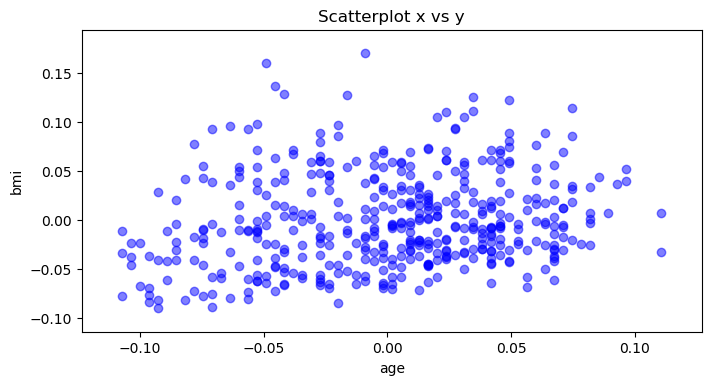

In [7]:
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(x_data, y_data, alpha=0.5, color='blue')
plt.xlabel(diabetes.feature_names[0])
plt.ylabel(diabetes.feature_names[2])
plt.title('Scatterplot x vs y')
plt.show()

In [8]:
# Do the same using plotly
trace = go.Scatter(
    x = x_data,
    y = y_data,
    mode = 'markers'
)

layout= go.Layout(
    title= 'Scatterplot x vs y',
    xaxis= dict(
        title= 'age',
    ),
    yaxis=dict(
        title= 'bmi',
    ),
    showlegend= False
)

fig= go.Figure(data=[trace], layout=layout)
iplot(fig)


<b>Correlation</b><br>
The first thing we can do to get an understanding of the relationship between these values is to perform a simple correlation analysis. Correlation (r) values are typically assigned using the Pearson correlation formula, which is defined as follows:
$$r = \frac{\sum (x - m_{x})(y - m_{y})}{\sqrt{\sum (x - m_{x})^2(y - m_{y})^2}}$$
As with other tests seen so far, we can associate a p-value which indicates the probability of a random analysis of two groups producing the same or better correlation. Generally speaking, these are not thought to be very reliable without very large sample sizes (>500).

In [9]:
print(stats.pearsonr(x_data, y_data))

(0.18508466614655558, 9.0767918654159328e-05)


<b>Ordinary Least Squares Regression</b><br>
Simple regression analysis is similar to correlation in that it tells us how well two points are associated. However, unlike correlation, regression supplies us with a line of best fit that we can then use to interpret new data points. Below we show two ways to perform regression. First, we use <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="#">Scikit learn</a>.

In [10]:
regr = linear_model.LinearRegression()
regr.fit(diabetes.data[:, :1], diabetes.data[:, 2:3])
print("Coefficient(s): %.4f" % regr.coef_)
print("Intercept: %.4f" % regr.intercept_)

Coefficient(s): 0.1851
Intercept: -0.0000


Next we use <a href="http://www.statsmodels.org/stable/index.html" target="#">StatsModel</a> to fit and summarize our OLS model. Note, this notation is based on that commonly used in 'R'.

In [11]:
df=pd.DataFrame({"age": x_data, "bmi": y_data})
model = ols("bmi ~ age", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     15.61
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           9.08e-05
Time:                        15:52:32   Log-Likelihood:                 726.71
No. Observations:                 442   AIC:                            -1449.
Df Residuals:                     440   BIC:                            -1441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.045e-16      0.002  -3.61e-13      1.0

Statsmodels also has methods to visualize the model we've built. These four plots are:
‘endog versus exog’
‘residuals versus exog’
‘fitted versus exog’
‘fitted plus residual versus exog’

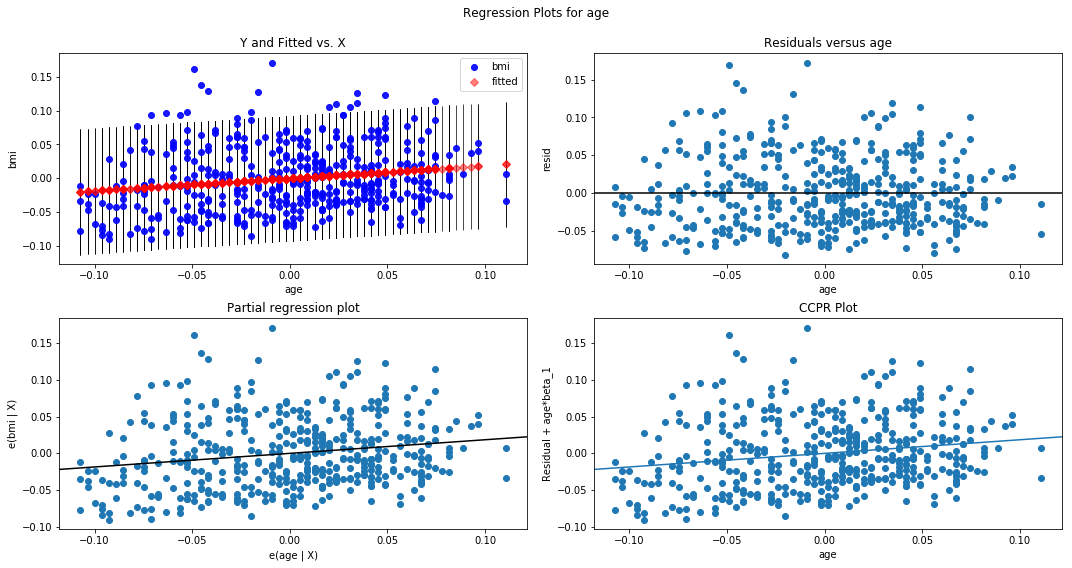

In [12]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)

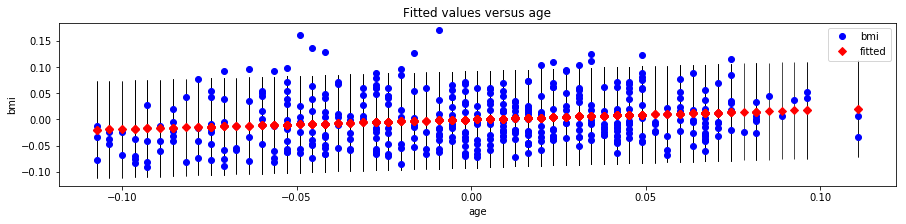

In [13]:
fig, ax = plt.subplots(figsize=(15, 3))
fig = sm.graphics.plot_fit(model, "age", ax=ax)

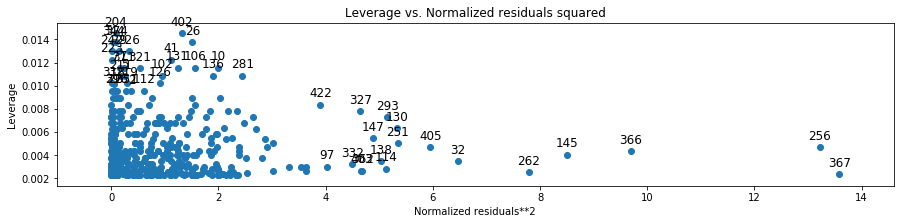

In [14]:
fig, ax = plt.subplots(figsize=(15,3))
fig = sm.graphics.plot_leverage_resid2(model, ax=ax)

## Class 06 - Examples

<b>Example 7.4</b><br>
Using the following data:
$$\overline{x} = 101.8, \ s_{x} = 63.2, \  \overline{y} = 101.8, \ s_{y} = 5.46, \ R = -0.499$$
Calculate the slope of the regression line against family income

In [18]:
mean_x = 101.8
sd_x = 63.2
mean_y = 101.8
sd_y = 5.46
r = -0.499

slope = (sd_y / sd_x) * r
print("Slope is %.4f" % slope)

Slope is -0.0431


<b>MarioKart</b><br>
The MarioKart dataset contains data from 141 online auctions, some of games in new condition, others in used condition.

In [19]:
mk_df = pd.read_csv("mariokart.csv")

In [20]:
mk_df.head()

,ID,duration,nBids,cond,startPr,shipPr,totalPr,shipSp,sellerRate,stockPhoto,wheels,title
0,1.503770e+11,3,20,new,0.99,4.00,51.55,standard,1580,yes,1,~~ Wii MARIO KART &amp; WHEEL ~ NINTENDO Wii ~...
1,2.604830e+11,7,13,used,0.99,3.99,37.04,firstClass,365,yes,1,Mariokart Wii Nintendo with wheel - Mario Kart...
2,3.204320e+11,3,16,new,0.99,3.50,45.50,firstClass,998,no,1,Mario Kart Wii (Wii)
3,2.804050e+11,3,18,new,0.99,0.00,44.00,standard,7,yes,1,Brand New Mario Kart Wii Comes with Wheel. Fre...
4,1.703920e+11,1,20,new,0.01,0.00,71.00,media,820,yes,2,BRAND NEW NINTENDO 1 WII MARIO KART WITH 2 WHE...


In [21]:
mk_df["salePr"] = mk_df["totalPr"] - mk_df["shipPr"]

In [22]:
# Get the 'Beer' and 'Water' datasets from the data frame
new_prices = mk_df["salePr"][mk_df["cond"]=="new"]
used_prices = mk_df["salePr"][mk_df["cond"]=="used"]

# Declare the trace objects
trace0 = go.Box(
    y=used_prices,
    name="Used"
)
trace1 = go.Box(
    y=new_prices,
    name="New"
)

data = [trace0, trace1]

layout = go.Layout(
    title = "Mariokart prices",
    yaxis = dict(title="Selling Price ($)"),
    xaxis = dict(title="Condition")
)

# Generate the plot
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [20]:
mk_df["cond_var"] = ""
mk_df["cond_var"][mk_df["cond"] == "used"] = 0
mk_df["cond_var"][mk_df["cond"] == "new"] = 1
model = ols("salePr ~ cond_var", data=mk_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salePr   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     74.63
Date:                Sat, 03 Mar 2018   Prob (F-statistic):           1.20e-14
Time:                        06:41:26   Log-Likelihood:                -485.82
No. Observations:                 141   AIC:                             975.6
Df Residuals:                     139   BIC:                             981.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        39.7366      0.844     47.083

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

